## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

"""Code Here
    建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 11s 224us/step - loss: 2.4626 - accuracy: 0.0969 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.4626 - accuracy: 0.0980 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.4626 - accuracy: 0.0994 - val_loss: 2.4626 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________

50000/50000 [==============================] - 18s 351us/step - loss: 2.8283 - accuracy: 0.6189 - val_loss: 3.0920 - val_accuracy: 0.5225
Epoch 46/50
50000/50000 [==============================] - 12s 237us/step - loss: 2.7938 - accuracy: 0.6196 - val_loss: 3.0164 - val_accuracy: 0.5309
Epoch 47/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.7520 - accuracy: 0.6233 - val_loss: 3.0543 - val_accuracy: 0.5189
Epoch 48/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.7120 - accuracy: 0.6231 - val_loss: 3.1480 - val_accuracy: 0.4903
Epoch 49/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.6810 - accuracy: 0.6226 - val_loss: 2.9255 - val_accuracy: 0.5329
Epoch 50/50
50000/50000 [==============================] - 13s 250us/step - loss: 2.6393 - accuracy: 0.6271 - val_loss: 2.8759 - val_accuracy: 0.5383
Experiment with Regulizer = 0.000000
Model: "model_1"
__________________________________________________________

50000/50000 [==============================] - 12s 238us/step - loss: 0.9609 - accuracy: 0.6621 - val_loss: 1.3551 - val_accuracy: 0.5333
Epoch 43/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.9497 - accuracy: 0.6652 - val_loss: 1.3755 - val_accuracy: 0.5217
Epoch 44/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.9381 - accuracy: 0.6702 - val_loss: 1.3718 - val_accuracy: 0.5321
Epoch 45/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.9233 - accuracy: 0.6751 - val_loss: 1.4213 - val_accuracy: 0.5225
Epoch 46/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.9132 - accuracy: 0.6778 - val_loss: 1.3774 - val_accuracy: 0.5346
Epoch 47/50
50000/50000 [==============================] - 11s 230us/step - loss: 0.9001 - accuracy: 0.6830 - val_loss: 1.4579 - val_accuracy: 0.5122
Epoch 48/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.8924 - accuracy: 0.6873 - va

50000/50000 [==============================] - 11s 226us/step - loss: 1.0117 - accuracy: 0.6447 - val_loss: 1.3814 - val_accuracy: 0.5229
Epoch 40/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.9990 - accuracy: 0.6487 - val_loss: 1.4654 - val_accuracy: 0.5007
Epoch 41/50
50000/50000 [==============================] - 11s 230us/step - loss: 0.9900 - accuracy: 0.6541 - val_loss: 1.3298 - val_accuracy: 0.5353
Epoch 42/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.9786 - accuracy: 0.6562 - val_loss: 1.3497 - val_accuracy: 0.5361
Epoch 43/50
50000/50000 [==============================] - 12s 235us/step - loss: 0.9653 - accuracy: 0.6618 - val_loss: 1.3649 - val_accuracy: 0.5296
Epoch 44/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.9542 - accuracy: 0.6657 - val_loss: 1.3460 - val_accuracy: 0.5407
Epoch 45/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.9425 - accuracy: 0.6684 - va

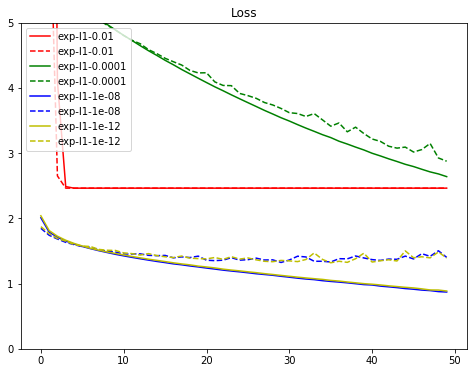

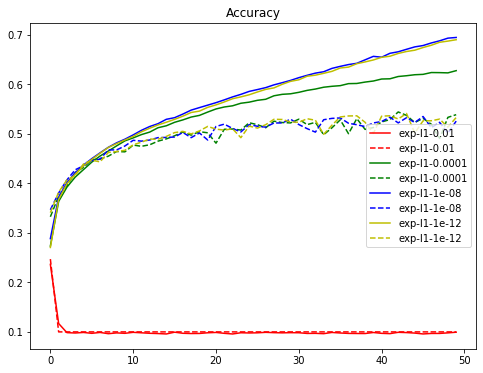

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()